In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.tsatools import lagmat
from statsmodels.tsa.stattools import coint
import matplotlib.cm as cm

In [37]:
import os
import pandas as pd
 
# assign path
path, dirs, files = next(os.walk("./nifty_2018_2022_day/"))
file_count = len(files)
# create empty list
dataframes_list = []


df = None
# append datasets to the list
for i in range(file_count):
    temp_df = pd.read_csv("./nifty_2018_2022_day/"+files[i], compression='gzip')
    df = pd.concat([df, temp_df[['close']].rename(columns = {'close':files[i][:-4]})], axis=1)
     
# display datasets
display(df)

,BHARTIARTL,TATASTEEL,BOSCHLTD,TITAN,INDUSTOWER,GODREJCP,BRITANNIA,HDFCLIFE,BANKBARODA,NIFTY 50,...,SBILIFE,DIVISLAB,BAJAJHLDNG,SBIN,INDUSINDBK,SIEMENS,BAJAJFINSV,BAJFINANCE,M&M,MUTHOOTFIN
0,518.15,72.20,19791.90,852.45,369.95,657.50,2369.12,389.65,161.50,10435.55,...,699.50,1099.05,2864.45,307.10,1623.85,1238.20,517.20,1725.65,744.65,470.30
1,507.05,72.95,19721.75,845.15,378.80,654.37,2328.02,395.50,157.95,10442.20,...,685.10,1080.90,2839.80,303.25,1643.95,1258.90,510.10,1724.65,752.90,458.90
2,508.65,73.50,19692.95,856.30,378.65,657.60,2340.47,385.65,157.85,10443.20,...,690.50,1099.40,2843.55,302.85,1630.25,1258.15,509.95,1715.30,754.90,457.35
3,513.35,76.00,19652.65,892.90,379.05,659.63,2313.20,399.00,163.90,10504.80,...,701.60,1106.55,2828.50,308.50,1646.60,1277.05,506.25,1754.00,756.00,461.95
4,530.05,77.05,19693.15,909.70,372.60,660.03,2322.05,407.00,161.80,10558.85,...,701.95,1107.65,2829.80,306.35,1698.20,1286.70,512.70,1814.50,756.35,471.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,843.25,105.45,16647.65,2601.75,200.75,848.10,4155.15,547.65,168.85,18267.25,...,1226.30,3299.95,6474.50,607.65,1174.35,2769.75,1636.20,6780.05,1235.70,1053.45
1212,848.35,105.50,16638.30,2610.20,201.50,862.80,4191.20,572.55,170.40,18484.10,...,1240.65,3305.40,6521.25,609.35,1175.55,2816.65,1634.00,6771.35,1254.05,1074.05
1213,846.85,106.20,16936.60,2595.40,203.10,859.35,4183.70,586.60,167.85,18512.75,...,1235.25,3342.65,6371.80,607.40,1187.10,2778.55,1633.70,6747.50,1260.80,1078.00
1214,837.40,104.90,16973.60,2592.25,203.30,854.05,4213.05,586.00,167.85,18562.75,...,1253.50,3375.55,6395.30,608.60,1197.85,2764.70,1652.85,6777.45,1250.70,1090.05


In [38]:
#data = pd.read_csv("SP500_constitutes_modified.csv")
# remove lic and nykaa
print(df.count().idxmin())
data = df
df.isna().any(axis=1).sum()
#print(df.count())
#df.count().idxmin()

BHARTIARTL


0

In [39]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing

In [40]:
#prices = data.drop("Date", axis=1)
prices = data

In [41]:
returns = prices.pct_change().dropna()

In [42]:
returns

,BHARTIARTL,TATASTEEL,BOSCHLTD,TITAN,INDUSTOWER,GODREJCP,BRITANNIA,HDFCLIFE,BANKBARODA,NIFTY 50,...,SBILIFE,DIVISLAB,BAJAJHLDNG,SBIN,INDUSINDBK,SIEMENS,BAJAJFINSV,BAJFINANCE,M&M,MUTHOOTFIN
1,-0.021422,0.010388,-0.003544,-0.008564,0.023922,-0.004760,-0.017348,0.015013,-0.021981,0.000637,...,-0.020586,-0.016514,-0.008605,-0.012537,0.012378,0.016718,-0.013728,-0.000579,0.011079,-0.024240
2,0.003156,0.007539,-0.001460,0.013193,-0.000396,0.004936,0.005348,-0.024905,-0.000633,0.000096,...,0.007882,0.017115,0.001321,-0.001319,-0.008334,-0.000596,-0.000294,-0.005421,0.002656,-0.003378
3,0.009240,0.034014,-0.002046,0.042742,0.001056,0.003087,-0.011652,0.034617,0.038328,0.005899,...,0.016075,0.006504,-0.005293,0.018656,0.010029,0.015022,-0.007256,0.022562,0.001457,0.010058
4,0.032531,0.013816,0.002061,0.018815,-0.017016,0.000606,0.003826,0.020050,-0.012813,0.005145,...,0.000499,0.000994,0.000460,-0.006969,0.031337,0.007556,0.012741,0.034493,0.000463,0.020998
5,-0.043769,-0.002596,0.015498,0.018028,0.004831,0.004697,0.010689,0.037101,-0.000927,0.006132,...,0.003134,0.007719,0.012404,-0.001795,0.012778,0.005246,0.018334,0.012317,0.004694,-0.002756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,-0.005132,0.002376,0.013731,-0.001707,-0.002980,0.007185,-0.000589,0.014261,0.012594,0.001263,...,-0.002238,-0.001709,-0.016952,0.014271,0.004233,-0.012039,-0.004351,0.014211,0.005902,-0.000664
1212,0.006048,0.000474,-0.000562,0.003248,0.003736,0.017333,0.008676,0.045467,0.009180,0.011871,...,0.011702,0.001652,0.007221,0.002798,0.001022,0.016933,-0.001345,-0.001283,0.014850,0.019555
1213,-0.001768,0.006635,0.017929,-0.005670,0.007940,-0.003999,-0.001789,0.024539,-0.014965,0.001550,...,-0.004353,0.011269,-0.022917,-0.003200,0.009825,-0.013527,-0.000184,-0.003522,0.005383,0.003678
1214,-0.011159,-0.012241,0.002185,-0.001214,0.000985,-0.006167,0.007015,-0.001023,0.000000,0.002701,...,0.014774,0.009842,0.003688,0.001976,0.009056,-0.004985,0.011722,0.004439,-0.008011,0.011178


In [43]:
N_PRIN_COMPONENTS = 50
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(returns)

PCA(n_components=50)

Text(0.5, 1.0, 'scree plot for PCA')

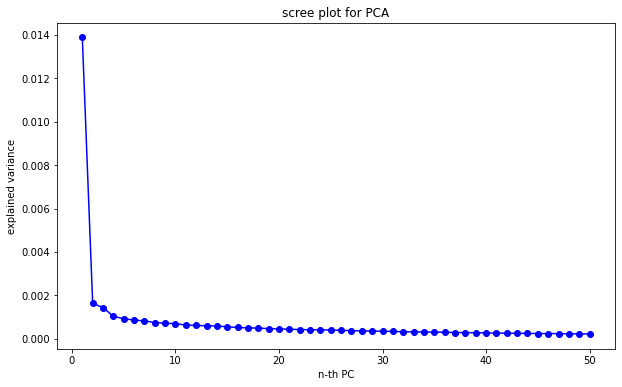

In [44]:
# A "scree" plot.
plt.figure(figsize=(10,6))
plt.plot(range(1,51),pca.explained_variance_,'b-o')
plt.ylabel("explained variance")
plt.xlabel("n-th PC")
plt.title("scree plot for PCA")

In [45]:
X = pca.components_.T
X = preprocessing.StandardScaler().fit_transform(X)

In [46]:
pca.components_.T.shape

(88, 50)

In [47]:
clf = DBSCAN(eps=3, min_samples=3)
#clf = KMeans()
print(clf)

clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print("\nClusters discovered: %d" % n_clusters_)

clustered = clf.labels_

DBSCAN(eps=3, min_samples=3)

Clusters discovered: 3


In [48]:
clustered

array([-1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1, -1,  2,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,
       -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [49]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print("Clusters formed: %d" % len(ticker_count_reduced))
print("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())
print(ticker_count_reduced)

Clusters formed: 3
Pairs to evaluate: 24
2    4
0    3
1    3
dtype: int64


In [50]:
X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

/Users/nikhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


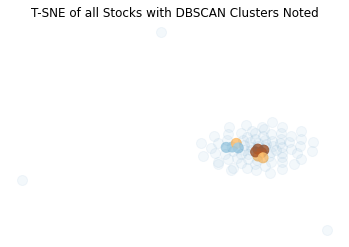

In [51]:
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')

plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted')
plt.savefig("tsne.png")

BRITANNIA     2
NESTLEIND     2
ASIANPAINT    0
TCS           1
COLPAL        2
HCLTECH       1
BERGEPAINT    0
HINDUNILVR    2
INFY          1
PIDILITIND    0
dtype: int64


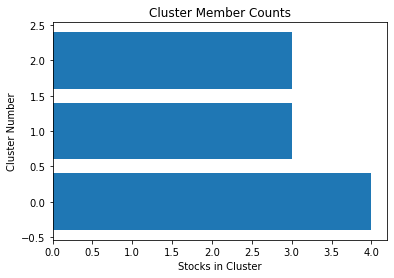

In [52]:
plt.barh(
    range(len(clustered_series.value_counts())),
    clustered_series.value_counts()
)
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number');
print(clustered_series)

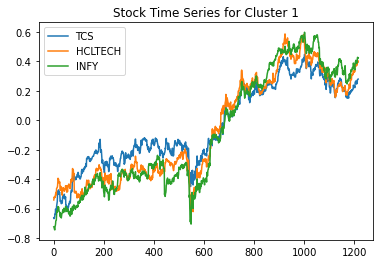

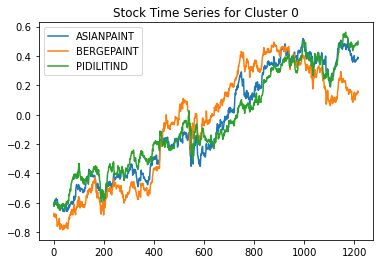

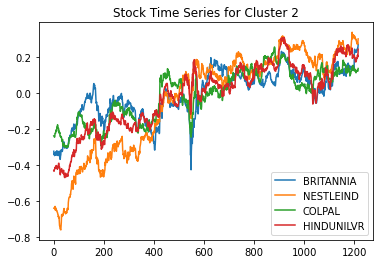

In [53]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(prices[tickers].mean())
    data = np.log(prices[tickers]).sub(means)
    data.plot(title='Stock Time Series for Cluster %d' % clust)

In [54]:
def find_cointegrated_pairs(data, significance=0.5):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [55]:
cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(
        prices[tickers]
    )
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [56]:
print("We found %d pairs." % len(pairs))

We found 3 pairs.


In [57]:
pairs

[('TCS', 'HCLTECH'), ('TCS', 'INFY'), ('HCLTECH', 'INFY')]

In [58]:
data

,BRITANNIA,NESTLEIND,COLPAL,HINDUNILVR
0,-0.322735,-0.638444,-0.237197,-0.429261
1,-0.340236,-0.638399,-0.238876,-0.433659
2,-0.334902,-0.638838,-0.241059,-0.424919
3,-0.346622,-0.637675,-0.244708,-0.423513
4,-0.342803,-0.639265,-0.238922,-0.420338
...,...,...,...,...
1211,0.239095,0.273110,0.128048,0.193943
1212,0.247733,0.281779,0.123600,0.210477
1213,0.245942,0.271281,0.122557,0.205877
1214,0.252933,0.285824,0.122019,0.201037
